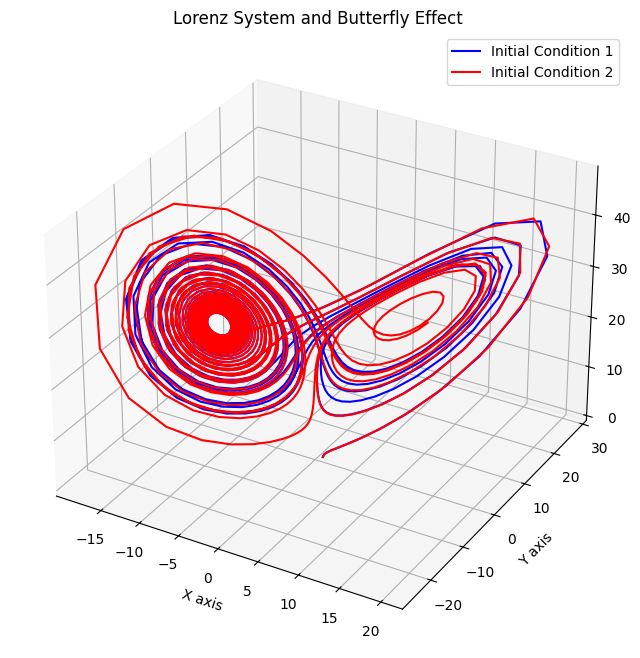

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

# Lorenz system of equations
def lorenz(X, t, sigma, rho, beta):
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Time points (Reduced to 1000 points for faster computation)
t = np.linspace(0, 30, 1000)  # Reduced number of time steps

# Initial conditions (slightly different starting points for the Butterfly Effect)
initial_conditions_1 = [1.0, 0.0, 0.0]   # First initial condition
initial_conditions_2 = [1.0, 0.1, 0.0]   # Slightly perturbed second initial condition

# Solve the system of differential equations
sol1 = odeint(lorenz, initial_conditions_1, t, args=(sigma, rho, beta))
sol2 = odeint(lorenz, initial_conditions_2, t, args=(sigma, rho, beta))

# Create the figure for animation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Setting labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Lorenz System and Butterfly Effect')

# Function to update the plot for each frame
def animate(i):
    ax.clear()  # Clear the previous frame
    ax.plot(sol1[:i, 0], sol1[:i, 1], sol1[:i, 2], label="Initial Condition 1", color="b")
    ax.plot(sol2[:i, 0], sol2[:i, 1], sol2[:i, 2], label="Initial Condition 2", color="r")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Lorenz System and Butterfly Effect')
    ax.legend()

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=20)  # Increase interval for smoother animation

# Save the animation as a video file
ani.save('chaos_theory_butterfly_effect_optimized.mp4', writer='ffmpeg', fps=30)

# Display the animation
plt.show()
